In [13]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

import keras.datasets as d
help(d)

Help on package keras.datasets in keras:

NAME
    keras.datasets - Small NumPy datasets for debugging/testing.

PACKAGE CONTENTS
    boston_housing
    cifar
    cifar10
    cifar100
    fashion_mnist
    imdb
    mnist
    reuters

FILE
    /Users/eunbilee/opt/anaconda3/envs/flyai/lib/python3.10/site-packages/keras/datasets/__init__.py




# 데이터

## 데이터 준비 : train / test

In [14]:
from tensorflow.keras.datasets import fashion_mnist

(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
# 이미지라서 묶어서 가져옴

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


### 데이터 확인

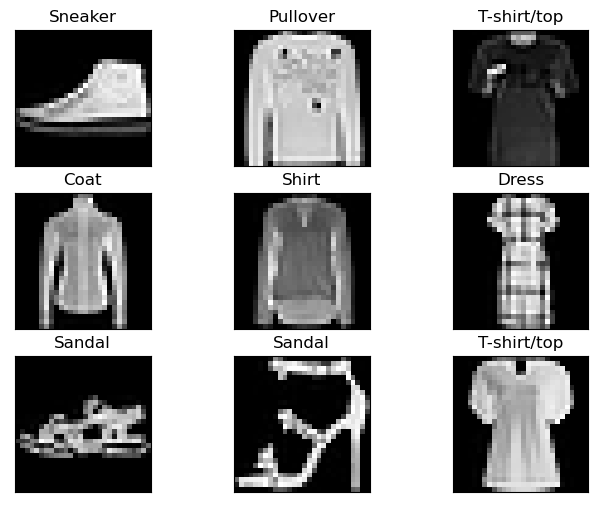

In [15]:
# 라벨 태그 만들기
class_names = ['T-shirt/top', 'Trouser', 'Pullover',
               'Dress', 'Coat', 'Sandal',
               'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

samples = np.random.randint(len(X_train), size=9)

plt.figure(figsize = (8, 6))
for i, idx in enumerate(samples):
    plt.subplot(3, 3, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(X_train[idx], cmap = 'gray')
    plt.title(class_names[y_train[idx]])
plt.show()

## 검증 데이터 분리 : train / validation

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.3, random_state=42)

print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)


## 정규화

In [17]:
# Grayscale 이므로, 0~255 까지의 값을 가짐
X_train = X_train.astype('float32') / 255.
X_val = X_val.astype('float32') / 255.
X_test = X_test.astype('float32') / 255.

print(np.max(X_train), np.min(X_train))

1.0 0.0


### shape *확인*

In [18]:
print(X_train.shape, y_train.shape)
print(X_val.shape, y_val.shape)
print(X_test.shape, y_test.shape)

(42000, 28, 28) (42000,)
(18000, 28, 28) (18000,)
(10000, 28, 28) (10000,)


In [19]:
# 채널 축 추가 : 2차원 데이터를 활용
import tensorflow as tf

X_train = X_train[..., tf.newaxis]
X_val = X_val[..., tf.newaxis]
X_test = X_test[..., tf.newaxis]

print('X_train : ', X_train.shape)
print('X_val : ', X_val.shape)
print('X_test : ', X_test.shape)

X_train :  (42000, 28, 28, 1)
X_val :  (18000, 28, 28, 1)
X_test :  (10000, 28, 28, 1)


# 모델

In [20]:
from tensorflow import keras
from tensorflow.keras import layers

def build_model():
    model = keras.Sequential()
    
    model.add(layers.Conv2D(filters=16, kernel_size= 3,
         strides=(1, 1), padding='same', activation='relu',
         input_shape=(28, 28, 1)))
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
    
    model.add(layers.Conv2D(filters=32, kernel_size= 3,
         strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
    
    model.add(layers.Conv2D(filters=64, kernel_size= 3,
         strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))

    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(10, activation = 'softmax'))
    
    return model

In [21]:
model = build_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)          18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 3, 3, 64)        

## 컴파일

In [22]:
adam = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam,
        loss = 'categorical_crossentropy',
        metrics=['acc'])

## 학습

In [23]:
EPOCHS = 30
BATCH_SIZE = 64

history = model.fit(X_train, y_train_oh,
           epochs = EPOCHS,
           batch_size = BATCH_SIZE,
           validation_data = (X_val, y_val_oh),
           verbose = 1)

Epoch 1/30
657/657 [==============================] - 17s 24ms/step - loss: 0.6123 - acc: 0.7759 - val_loss: 0.4500 - val_acc: 0.8354
Epoch 2/30
657/657 [==============================] - 15s 23ms/step - loss: 0.3689 - acc: 0.8652 - val_loss: 0.3411 - val_acc: 0.8724
Epoch 3/30
657/657 [==============================] - 15s 24ms/step - loss: 0.3192 - acc: 0.8839 - val_loss: 0.2948 - val_acc: 0.8919
Epoch 4/30
657/657 [==============================] - 16s 25ms/step - loss: 0.2832 - acc: 0.8961 - val_loss: 0.3082 - val_acc: 0.8867
Epoch 5/30
657/657 [==============================] - 15s 24ms/step - loss: 0.2648 - acc: 0.9033 - val_loss: 0.2890 - val_acc: 0.8951
Epoch 6/30
657/657 [==============================] - 16s 24ms/step - loss: 0.2425 - acc: 0.9096 - val_loss: 0.2640 - val_acc: 0.9007
Epoch 7/30
657/657 [==============================] - 18s 27ms/step - loss: 0.2259 - acc: 0.9178 - val_loss: 0.2489 - val_acc: 0.9113
Epoch 8/30
657/657 [==============================] - 17s 26ms

In [24]:
import matplotlib.pyplot as plt
import pandas as pd

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure(figsize=(16,8))
    plt.subplot(1,2,1)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')
    plt.plot(hist['epoch'], hist['val_loss'], label = 'Val Loss')
    plt.legend()
    
    plt.subplot(1,2,2)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.plot(hist['epoch'], hist['acc'], label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_acc'], label = 'Val Accuracy')
    plt.legend()
    
    plt.show()

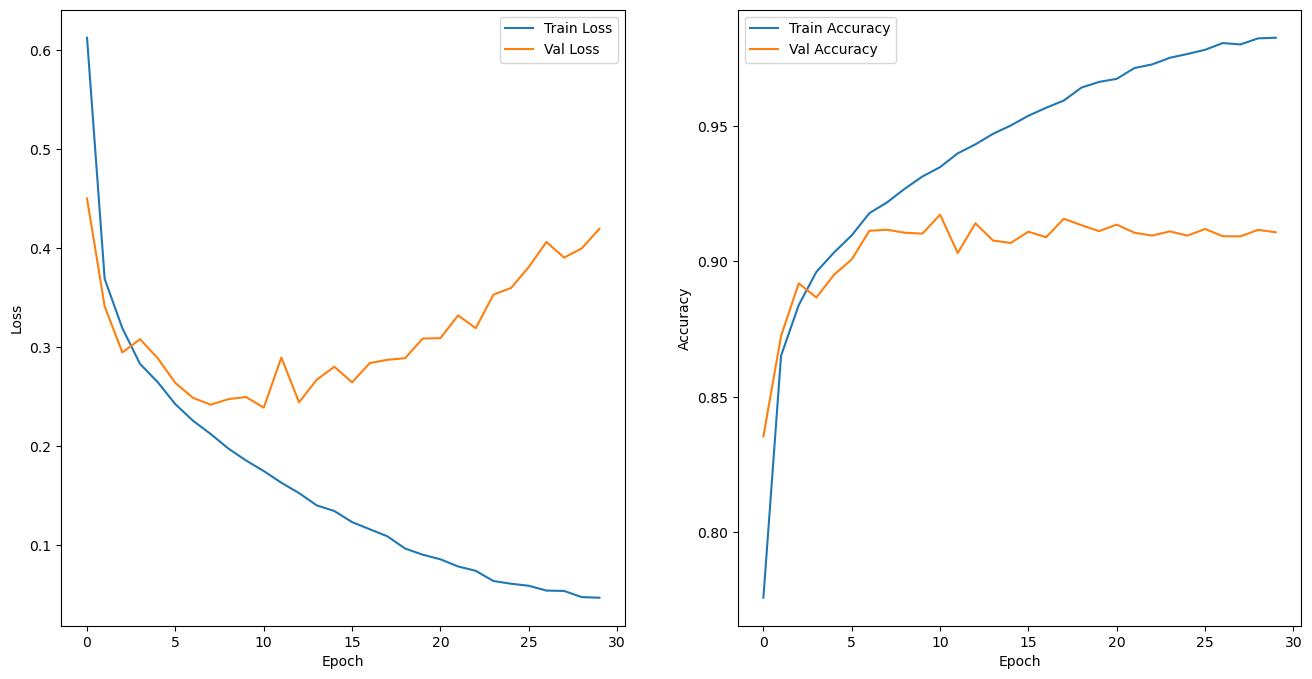

In [25]:
plot_history(history)

# 📌 드롭아웃(drop-out)

## 모델

In [74]:
from tensorflow import keras
from tensorflow.keras import layers

def build_dropout_model():
    model = keras.Sequential()
    
    model.add(layers.Conv2D(filters=16, kernel_size= 3,
                            strides=(1, 1), padding='same', activation='relu',
                            input_shape=(28, 28, 1)))
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(layers.Dropout(0.2)) # 0.05 까지도 줄수있음.
    
    model.add(layers.Conv2D(filters=32, kernel_size= 3,
                            strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Conv2D(filters=64, kernel_size= 3,
                            strides=(1, 1), padding='same', activation='relu'))
    model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))
    model.add(layers.Dropout(0.2))
    
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation = 'relu'))
    model.add(layers.Dense(10, activation = 'softmax'))
    
    return model

In [37]:
model = build_dropout_model()
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 dropout_6 (Dropout)         (None, 14, 14, 16)        0         
                                                                 
 conv2d_10 (Conv2D)          (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 7, 7, 32)         0         
 g2D)                                                            
                                                                 
 dropout_7 (Dropout)         (None, 7, 7, 32)         

## 컴파일 및 학습

In [38]:
model.compile(optimizer='adam',
        loss = 'categorical_crossentropy',
        metrics=['acc'])

In [40]:
EPOCHS = 30
BATCH_SIZE = 64
history = model.fit(X_train, y_train_oh,
                    epochs = EPOCHS,
                    batch_size = BATCH_SIZE,
                    validation_data = (X_val, y_val_oh),
                    verbose = 1)

Epoch 1/30
657/657 [==============================] - 18s 28ms/step - loss: 0.2147 - acc: 0.9176 - val_loss: 0.2127 - val_acc: 0.9216
Epoch 2/30
657/657 [==============================] - 16s 24ms/step - loss: 0.2113 - acc: 0.9196 - val_loss: 0.2228 - val_acc: 0.9179
Epoch 3/30
657/657 [==============================] - 16s 24ms/step - loss: 0.2115 - acc: 0.9199 - val_loss: 0.2171 - val_acc: 0.9211
Epoch 4/30
657/657 [==============================] - 16s 25ms/step - loss: 0.2059 - acc: 0.9228 - val_loss: 0.2204 - val_acc: 0.9175
Epoch 5/30
657/657 [==============================] - 16s 25ms/step - loss: 0.2060 - acc: 0.9224 - val_loss: 0.2114 - val_acc: 0.9221
Epoch 6/30
657/657 [==============================] - 21s 32ms/step - loss: 0.2056 - acc: 0.9213 - val_loss: 0.2162 - val_acc: 0.9206
Epoch 7/30
657/657 [==============================] - 18s 27ms/step - loss: 0.2025 - acc: 0.9237 - val_loss: 0.2083 - val_acc: 0.9242
Epoch 8/30
657/657 [==============================] - 16s 25ms

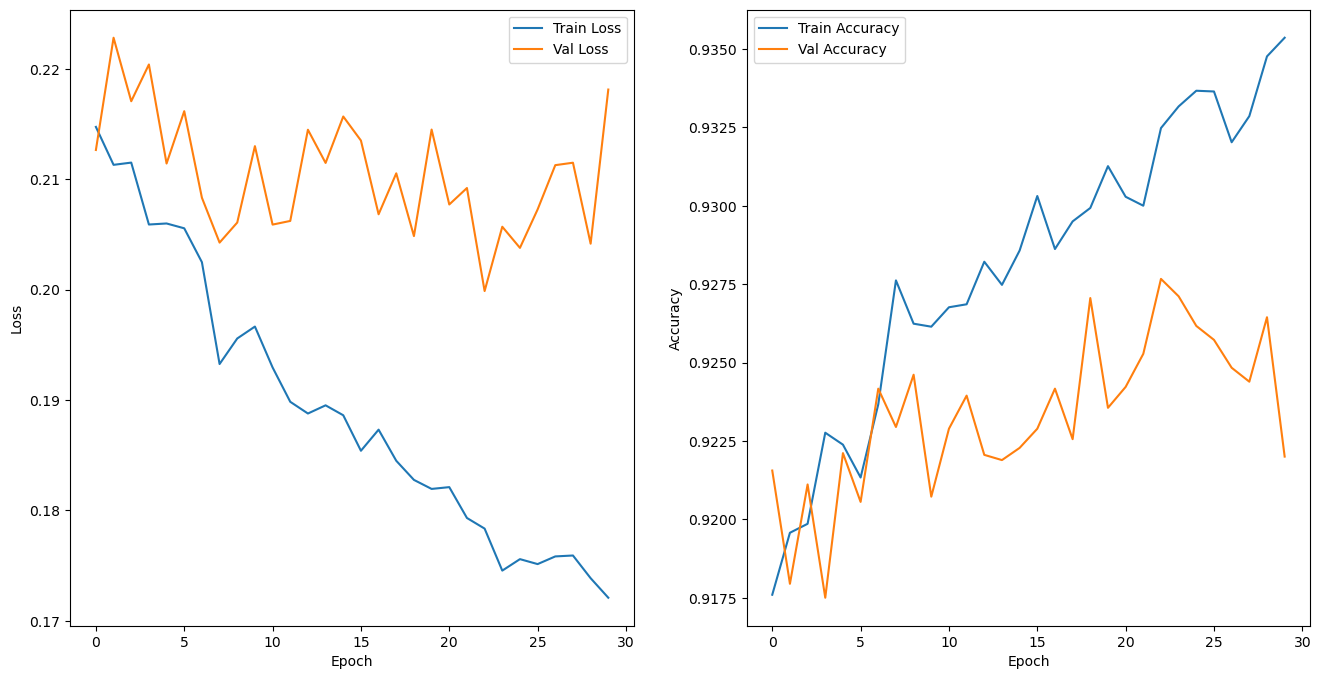

In [41]:
plot_history(history)

## 예측

In [42]:
y_pred = model.predict(X_test)
y_pred_argmax = np.argmax(y_pred, axis=1)

y_pred_argmax[:10]

313/313 [==============================] - 1s 4ms/step


array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

## 예측값 시각화

<Figure size 1600x600 with 0 Axes>

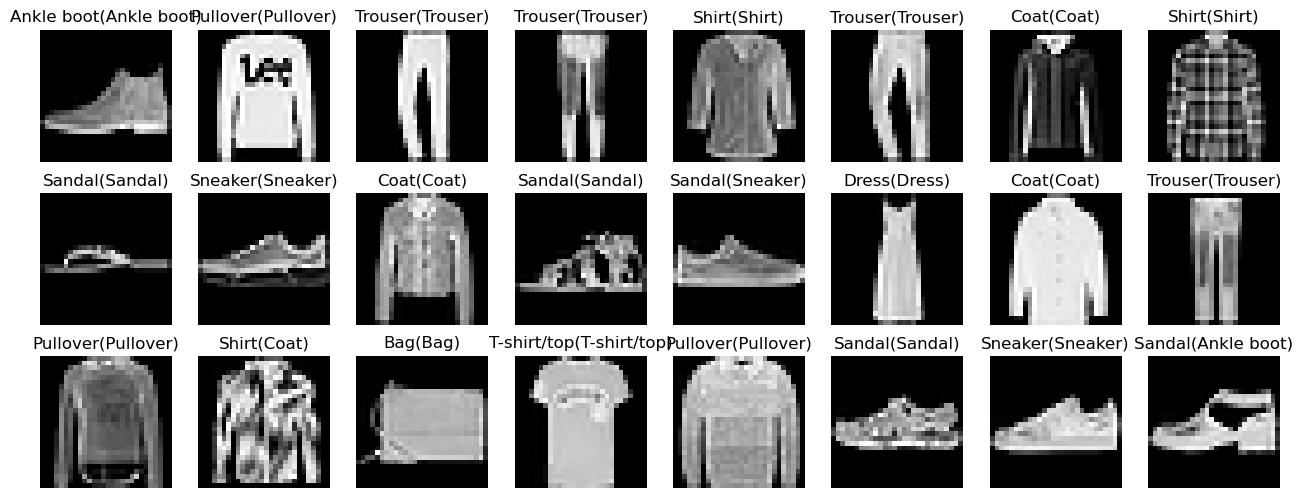

In [43]:
n_rows = 3
n_cols = 8

plt.figure(figsize=(n_cols * 2, n_rows * 2))
plt.figure(figsize=(n_cols * 2, n_rows * 2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_test[index].reshape(28, 28), cmap="gray")
        plt.axis('off')
        plt.title(f'{class_names[y_pred_argmax[index]]}({class_names[y_test[index]]})')

plt.show()

## 혼동행렬 시각화

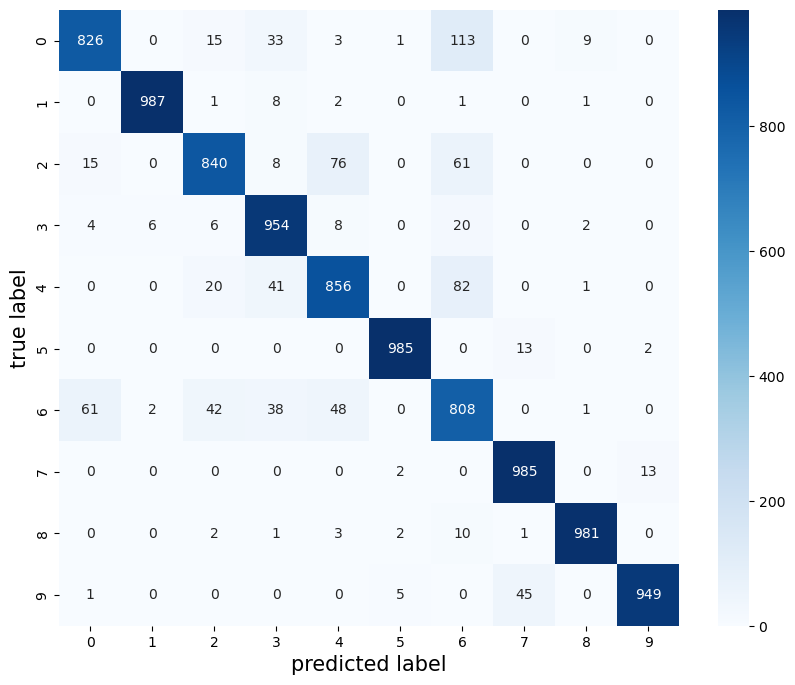

In [44]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_matrix(y_test, y_pred):
    plt.figure(figsize = (10, 8))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot = True, fmt = 'd',cmap = 'Blues')
    plt.xlabel('predicted label', fontsize = 15)
    plt.ylabel('true label', fontsize = 15)
    plt.show()
    
plot_matrix(y_test, y_pred_argmax)

## 평가 지표 계산

In [45]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def print_score(y_test, y_pred):
    print('accuracy: %.3f' % (accuracy_score(y_test, y_pred)))
    print('precision: %.3f' % (precision_score(y_test, y_pred, average='macro')))
    print('recall_score: %.3f' % (recall_score(y_test, y_pred, average='macro')))
    print('f1_score: %.3f' % (f1_score(y_test, y_pred, average='macro')))
    
print_score(y_test, y_pred_argmax)

accuracy: 0.917
precision: 0.919
recall_score: 0.917
f1_score: 0.917


---

# Loss : sparse_categorical_crossentropy 사용하기

## 모델의 컴파일

In [75]:
model = build_dropout_model()

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])

## 모델의 학습

In [76]:
EPOCHS = 15
BATCH_SIZE = 64
history = model.fit(X_train, y_train,
           epochs = EPOCHS,
           batch_size = BATCH_SIZE,
           validation_data = (X_val, y_val),
           verbose = 1)

Epoch 1/15
657/657 [==============================] - 19s 28ms/step - loss: 0.7359 - acc: 0.7284 - val_loss: 0.4482 - val_acc: 0.8419
Epoch 2/15
657/657 [==============================] - 16s 25ms/step - loss: 0.4509 - acc: 0.8355 - val_loss: 0.3575 - val_acc: 0.8689
Epoch 3/15
657/657 [==============================] - 17s 26ms/step - loss: 0.3889 - acc: 0.8564 - val_loss: 0.3205 - val_acc: 0.8827
Epoch 4/15
657/657 [==============================] - 18s 28ms/step - loss: 0.3533 - acc: 0.8703 - val_loss: 0.3022 - val_acc: 0.8896
Epoch 5/15
657/657 [==============================] - 19s 30ms/step - loss: 0.3321 - acc: 0.8774 - val_loss: 0.2843 - val_acc: 0.8966
Epoch 6/15
657/657 [==============================] - 19s 29ms/step - loss: 0.3132 - acc: 0.8848 - val_loss: 0.2681 - val_acc: 0.9004
Epoch 7/15
657/657 [==============================] - 17s 27ms/step - loss: 0.2986 - acc: 0.8900 - val_loss: 0.2615 - val_acc: 0.9054
Epoch 8/15
657/657 [==============================] - 17s 26ms

## 예측

In [77]:
y_pred = model.predict(X_test)
y_pred[:1]

# 라벨 태그
# class_names = ['T-shirt/top', 'Trouser', 'Pullover',
#                'Dress', 'Coat', 'Sandal',
#                'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

313/313 [==============================] - 1s 4ms/step


array([[1.9156521e-07, 3.2527283e-09, 4.2210672e-08, 1.5630192e-07,
        6.8387973e-10, 1.4311980e-04, 1.6041762e-08, 1.6012607e-03,
        6.5955951e-06, 9.9824870e-01]], dtype=float32)

## 평가 지표 계산

In [78]:
y_pred_argmax = np.argmax(y_pred, axis=1)
print_score(y_test, y_pred_argmax)

accuracy: 0.910
precision: 0.910
recall_score: 0.910
f1_score: 0.909
